# Optimization Studies



In [1]:
import numpy as np
import h5py
import sys
import os
import pandas as pd
from glob import glob

sys.path.append("../..")
from usefulFcts import *
from trainNet import myLSTM, DIPS
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

**Question 1:** Is there a difference between using attention or *not* when I train with the looser track selections?

In [2]:
%%bash
nvidia-smi

Fri Mar 20 19:16:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.64       Driver Version: 430.64       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 23%   33C    P0    57W / 250W |      0MiB / 11178MiB |      0%   E. Process |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:05:00.0 Off |                  N/A |
| 21%   31C    P0    59W / 250W |      0MiB / 12196MiB |      0%   E. Process |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [2]:
dataDir = "../../data/"
modelDir = "../../models/"
figDir = "../../figures/"

nTrks=40
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"

dense_sizes = [100] * 3
ppm_sizes = [100,100,128]

Initialize method from myModel()
Instructions for updating:
Colocations handled automatically by placer.
weightFile ../../models/mc16d_PFlow_ttbar_pt_0.5_d0_3.5_z0_5.0/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_weights.h5
Loading previously trained DIPS weight file
acc
loss
val_acc
val_loss


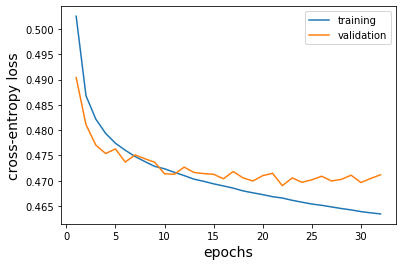

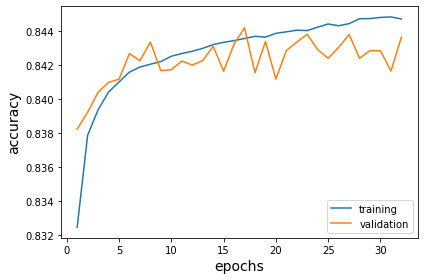

../../models/mc16d_PFlow_ttbar_pt_0.5_d0_3.5_z0_5.0/effs_DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits.json
Load in the previously saved efficiency file
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_jf/DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_weights.h5
Loading previously trained DIPS weight file
acc
loss
val_acc
val_loss


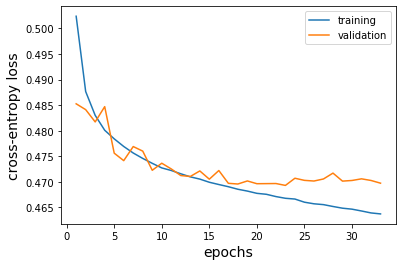

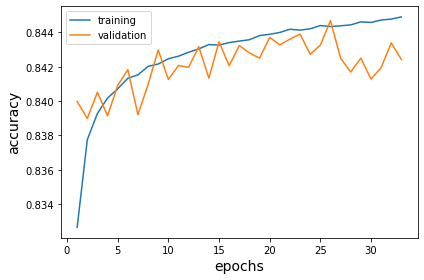

../../models/mc16d_PFlow_ttbar_jf/effs_DIPS_phi_100_100_128_F_100_100_100_3out_bn_attn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits.json
Load in the previously saved efficiency file
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_ttbar_jf/DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_weights.h5
Loading previously trained DIPS weight file
acc
loss
val_acc
val_loss


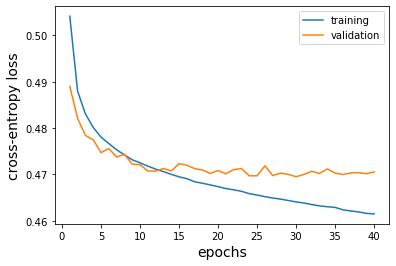

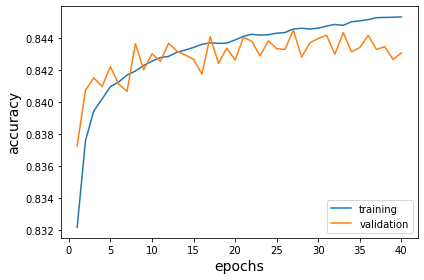

../../models/mc16d_PFlow_ttbar_jf/effs_DIPS_phi_100_100_128_F_100_100_100_3out_bn_3mtrain_40trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits.json
Load in the previously saved efficiency file


In [3]:
leffs, ceffs, beffs = [], [], []

sortFlags = ["abs_sd0_rev"] + ["sd0_rev","sd0_rev"]
tags = ["_pt_0.5_d0_3.5_z0_5.0"] + ["_jf","_jf"]
attns = [False,True,False]

for sortFlag, tag, attn in zip(sortFlags, tags, attns):
     
    dataTagTrain = "3mtrain_{}trks_{}".format(nTrks, vStr)
    dataTagTest  = "2mtest_{}trks_{}_{}".format(nTrks, vStr, sortFlag)
    
    '''
    Load in the data
    '''
    subDir = 'mc16d_PFlow_ttbar' + tag
    f_name = "{}/{}/data_{}.hdf5".format(dataDir,subDir,dataTagTest)
    f = h5py.File(f_name,"r")

    X = f['X_test'][:]
    y = f['y_test'][:]
    ix = f['ix_test'][:]

    f.close()
    
    nFeatures = X.shape[-1]
    
    '''
    Load in the model
    '''
    dips = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=nFeatures,
                modelDir=modelDir+subDir, dataTag=dataTagTrain, nClasses=3, 
                loadModel=True, dropout=0,batch_norm=True,attn=attn)
    
    trainingMetrics(dips.modelName, modelDir+subDir)
    #break
    
    '''
    Evaluate the taggers
    '''
    if attn:
        leff, ceff, beff = getEffs(dips, X, y, ix, figDir=figDir,
                                     subDir=subDir, modelDir=modelDir+subDir,colors=['C6','C9','C4'])
    else:
        leff, ceff, beff = getEffs(dips, X, y, ix, figDir=figDir,
                                   subDir=subDir, modelDir=modelDir+subDir)
    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)
            

Cool, it looks like trackless jets really aren't an issue for when we loosen these track selections.

**Compare training metrics**

In [6]:
labels = ['DIPS |$s_{d0}$| sort','DIPS w/ attn $s_{d0}$ sort','DIPS $s_{d0}$ sort']
title='JF trk $p_T$ IP + cuts'
colors=['C4','C6','C4']
styles=['-','--','--']

text="$\mathbf{ATLAS}$ Internal Simulation\n"
text+=r"$\sqrt{s}$ = 13 TeV $t\bar{t}$ non-hadronic"

In [7]:
?plotROCRatio

In [8]:
len(beffs)

3

In [9]:
nTest = np.sum(y==0)

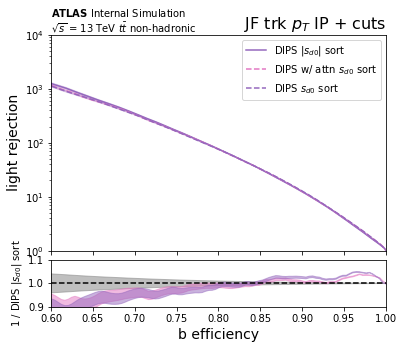

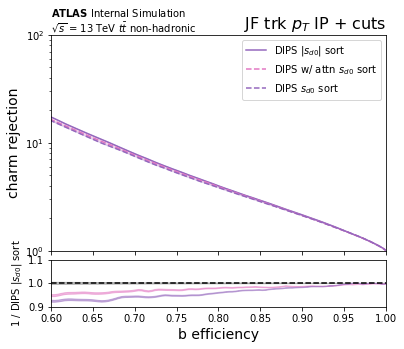

In [10]:
tag = 'rej_jfCuts_cfSorts'

plotROCRatio(beffs, leffs, labels, rrange=(0.9,1.1),ymax=1e4,colors=colors,
             binomialErrors=True,styles=styles,title=title,text=text,nTest=nTest,
             ylabel='light rejection',rlabel=f'1 / {labels[0]}',
             figDir='figures',subDir='',tag='l'+tag)
plotROCRatio(beffs, ceffs, labels, rrange=(0.9,1.1),ymax=1e2,colors=colors,
             binomialErrors=True,styles=styles,title=title,text=text,nTest=nTest,
             ylabel='charm rejection',rlabel=f'1 / {labels[0]}',
             figDir='figures',subDir='',tag='c'+tag)

My new training has a 10% drop in efficiency, for the tight WP... is this physical?

- Maybe I'll need to re-look into these efficiency studies?
- It could also be due to the sort that we're using? ($|s_{d0}|$ vs $s_{d0}$).


**Rafael's thoughts:** Rafael said 40 tracks was hella conservative for R=0.4 jets in $t\bar{t}$ as this the the track multiplicity cut typically used for large-R jet studies.

So he *didn't* think the track ordering was an issue for this study, so I decided to try to train dips without attention and the $s_{d0}$ sort to see if I can get a similar performance that I was seeing for the $|s_{d0}|$ sort studies.


## Even looser track cuts

Ok - I'm just trying to evaluate the final curves that we're going to put into a note now!!


Just remake the discriminant plot.

In [3]:
tag='pt_1000_d0_1_z0_1.5'
i = 1

sortFlag = 'sd0_rev'
dense_sizes = [100] * 2
ppm_sizes = [100,100,128]

vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"

nTrks = 15

dataTagTrain = "3mtrain_{}trks_{}".format(nTrks,vStr)
dataTagTest  = "3mtest_15trks_{}_{}".format(vStr, sortFlag)

'''
Load in the data
'''
subDir = 'mc16d_PFlow_BTagging201903_ttbar_' + tag
f_name = "{}/{}/data_{}.hdf5".format(dataDir,subDir,dataTagTest)
f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter1_weights.h5
Loading previously trained DIPS weight file
../../PyATLASstyle/PyATLASstyle.py
min: -12.31, max: 20.02


../../plottingFcts.py:189: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 20)


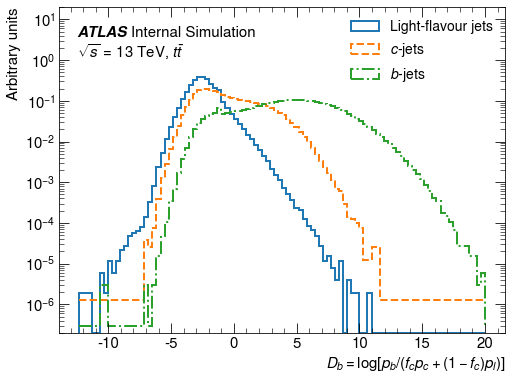

In [7]:
dips = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=X.shape[-1],
            modelDir=modelDir+subDir, dataTag=dataTagTrain+f'_iter{i}', 
            batch_norm=True, nClasses=3, loadModel=True)

l,c,b = sigBkgEff(dips, X, y, ix, figDir='figures',
                  subDir=subDir, modelDir=modelDir, colors=['C0','C1','C2'])


In [6]:
subDir

'mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5'

In [44]:
tag='pt_1000_d0_1_z0_1.5'

dense_sizes = [100] * 2
ppm_sizes = [100,100,128]

vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"

models = ['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10']
leffs, ceffs, beffs, discs = {m:[] for m in models},{m:[] for m in models},{m:[] for m in models}, {m:[] for m in models}
ys, pts, etas, mus = {m:[] for m in models}, {m:[] for m in models}, {m:[] for m in models}, {m:[] for m in models}
nIter=5

for nTrks, tag in zip([15,25,25],models):
    
    # Get the corresponding data tags
    dataTagTrain = "3mtrain_{}trks_{}".format(nTrks,vStr)
    dataTagTest  = "3mtest_15trks_{}_{}".format(vStr, sortFlag)

    '''
    Load in the data
    '''
    subDir = 'mc16d_PFlow_BTagging201903_ttbar_' + tag
    f_name = "{}/{}/data_{}.hdf5".format(dataDir,subDir,dataTagTest)
    f = h5py.File(f_name,"r")

    X = f['X_test'][:]
    y = f['y_test'][:]
    ix = f['ix_test'][:]

    f.close()

    '''
    Also load in the jet df to save the pT and eta information 
    '''
    jdf =  pd.read_hdf(f"{dataDir}/{subDir}/jet_3mtest_{nTrks}trks_{sortFlag}.h5", key='jet_df')
    ys[tag] = y
    pts[tag] = jdf.pt
    etas[tag] = jdf.eta
    mus[tag] = jdf.avgmu
    
    nFeatures = X.shape[-1]
    
    # Load in the evaluation data
    for i in range(nIter):

        # Load in the model
        dips = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=nFeatures,
                    modelDir=modelDir+subDir, dataTag=dataTagTrain+f'_iter{i}', 
                    batch_norm=True, nClasses=3, loadModel=True)

        (leff, ceff, beff),d = getEffs(dips, X, y, ix, figDir=figDir,returnDisc=True,
                                       subDir=subDir, modelDir=modelDir, colors=['C6','C1','C4'])

        leffs[tag].append(leff)
        ceffs[tag].append(ceff)
        beffs[tag].append(beff)
        discs[tag].append(d)
        

Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter0_weights.h5
Loading previously trained DIPS weight file
../../models//effs_DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter0.json
Load in the previously saved efficiency file
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter1_weights.h5
Loading previously trained DIPS w

Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_500_d0_8_z0_10/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter3_weights.h5
Loading previously trained DIPS weight file
../../models//effs_DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter3.json
Load in the previously saved efficiency file
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_500_d0_8_z0_10/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_iter4_weights.h5
Loading previously trained DIPS weigh

In [7]:
tag

'pt_500_d0_8_z0_10'

In [ ]:
modelLabels = ['$p_T$ > 1 GeV, $|d_0|$ < 1 mm\n'+r'$|z_0\sin \theta |$ < 1.5 mm',
               '$p_T$ > 0.5 GeV, $|d_0|$ < 3.5 mm\n'+r'$|z_0\sin \theta |$ < 5 mm',
               '$p_T$ > 0.5 GeV, $|d_0|$ < 8 mm\n'+r'$|z_0\sin \theta |$ < 10 mm']
#tag='rej_rnnip_dips_attn'

compareModels(beffs, leffs, modelLabels[:2], models[:2], ymax=1e4,
              ylabel='Light-flavour jet rejection',#rlabel='JF / IP3D',
              colors=['C4','C6','C1'],legLoc='lower left',
              tag='l_'+models[1].replace('.','_'))

compareModels(beffs, ceffs, modelLabels[:2], models[:2],ymax=100,
              ylabel='$c$-jet rejection',#rlabel='JF / IP3D',
              colors=['C4','C6','C1'],legLoc='center right',
              tag='c_'+models[1].replace('.','_'))

Ok - in the meantime I was interested in seeing if adding the IPs could give more gains w/ the looser selection

In [9]:
models

['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10']

In [58]:
vs = ['_ip3d_d0_ip3d_z0','_phi_theta','_qoverp']

for nTrks, trkSel in zip([25,25],['pt_500_d0_3.5_z0_5']):#, 'pt_500_d0_8_z0_10']):

    vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
    
    for v in vs:
    
        vStr += v
    
        # Get the corresponding data tags
        dataTagTrain = "3mtrain_{}trks_{}".format(nTrks,vStr)
        dataTagTest  = "3mtest_{}trks_{}_{}".format(nTrks, vStr, sortFlag)

        '''
        Load in the data
        '''
        subDir = 'mc16d_PFlow_BTagging201903_ttbar_' + trkSel
        f_name = "{}/{}/data_{}.hdf5".format(dataDir,subDir,dataTagTest)
        f = h5py.File(f_name,"r")

        X = f['X_test'][:]
        y = f['y_test'][:]
        ix = f['ix_test'][:]

        f.close()
        
        nFeatures = X.shape[-1]

        # Load in the evaluation data
        tag = trkSel+v
        leffs[tag], ceffs[tag], beffs[tag], discs[tag] = [], [], [], []
        print(tag)
        
        for i in range(nIter):

            # Load in the model
            dips = DIPS(ppm_sizes, dense_sizes, timeSteps=nTrks, nFeatures=nFeatures,
                        modelDir=modelDir+subDir, dataTag=dataTagTrain+f'_iter{i}', 
                        batch_norm=True, nClasses=3, loadModel=True)

            (leff, ceff, beff), d = getEffs(dips, X, y, ix, figDir=figDir,returnDisc=True,
                                            subDir=subDir, modelDir=modelDir, colors=['C6','C1','C4'])

            leffs[tag].append(leff)
            ceffs[tag].append(ceff)
            beffs[tag].append(beff)
            discs[tag].append(d)
        break
    break

pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_500_d0_3.5_z0_5/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_ip3d_d0_ip3d_z0_iter0_weights.h5
Loading previously trained DIPS weight file
../../models//effs_DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_ip3d_d0_ip3d_z0_iter0.json
Load in the previously saved efficiency file
Initialize method from myModel()
weightFile ../../models/mc16d_PFlow_BTagging201903_ttbar_pt_500_d0_3.5_z0_5/DIPS_phi_100_100_128_F_100_100_3out_bn_3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPi

In [ ]:
trkSelLabels = ['Standard DIPS',
                r'DIPS + $d_0,z_0 \sin \theta$',
                r'DIPS + $d_0,z_0 \sin \theta, \phi,\theta$',
                r'DIPS + $d_0,z_0 \sin \theta, \phi,\theta,q/p$']

lab1 = [f'pt_500_d0_3.5_z0_5{v}' for v in ['']+vs]

secondTag=r"$\sqrt{s}$ = 13 TeV, $t\bar{t}$ non-hadronic"
secondTag+='\n'+r'$p_T$ > 500 MeV, $|d_0|$ < 3.5 mm, $|z_0\sin \theta |$ < 5 mm'
myColors=['C6','C1','C3','C0']

compareModels(beffs, leffs, trkSelLabels[:2], lab1[:2], ymax=1e5,
              ylabel='Light-flavour jet rejection',rlabel='1 / std',
              colors=myColors,legLoc='lower left',
              secondTag=secondTag)#,tag='l'+tag)

compareModels(beffs, ceffs, trkSelLabels[:2], lab1[:2],ymax=100,
              ylabel='$c$-jet rejection',rlabel='1 / std',
              colors=myColors,legLoc='lower left',
              secondTag=secondTag)#,tag='c'+tag)

**New plan:** I'll overlay DIPS, DIPS looser cuts, DIPS looser cuts + IPs

pt_1000_d0_1_z0_1.5 5
pt_500_d0_3.5_z0_5 5
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 5


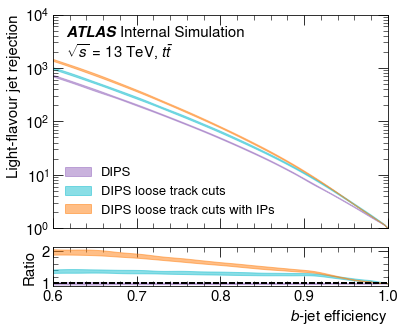

pt_1000_d0_1_z0_1.5 5
pt_500_d0_3.5_z0_5 5
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 5


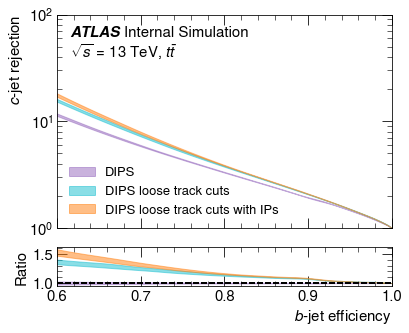

In [62]:
trkSelLabels = ['DIPS','DIPS loose track cuts','DIPS loose track cuts with IPs']

lab3 = ['pt_1000_d0_1_z0_1.5','pt_500_d0_3.5_z0_5', 
        'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0',]

secondTag=r"$\sqrt{s}$ = 13 TeV, $t\bar{t}$"
myColors=['C4','C9','C1']

compareModels(beffs, leffs, trkSelLabels, lab3, ymax=1e4,
              ylabel='Light-flavour jet rejection',#rlabel='1 / DIPS',
              colors=myColors,legLoc='lower left',
              secondTag=secondTag,tag='l_trkOpt',legFontSize=13)

compareModels(beffs, ceffs, trkSelLabels, lab3,ymax=100,
              ylabel='$c$-jet rejection',#rlabel='1 / DIPS',
              colors=myColors,legLoc='lower left',
              secondTag=secondTag,tag='c_trkOpt',legFontSize=13)

**Next:** Performance plots!

For these plots we're going to compare
- RNNIP
- DIPS
- optimized DIPS

In [13]:
modelDir

'../../models/'

In [14]:
dataTagTrain

'3mtrain_25trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_ip3d_d0_ip3d_z0_phi_theta_qoverp'

In [53]:
leffs['rnnip'], ceffs['rnnip'], beffs['rnnip'], discs['rnnip'] = [], [], [], []

subDir = 'mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5'

vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTrain = f'3mtrain_15trks_{vStr}'


for i in range(nIter):

    # Load in the model
    rnnip = myLSTM(modelDir=modelDir+subDir, nFeatures=13, 
                   dataTag=dataTagTrain+f'_sd0_rev_iter{i}', 
                   nHidden=100,loadModel=True,nClasses=3)


    (leff, ceff, beff), d = getEffs(rnnip, X, y, ix, returnDisc=True,
                                    subDir='', modelDir=rnnip.modelDir)

    leffs['rnnip'].append(leff)
    ceffs['rnnip'].append(ceff)
    beffs['rnnip'].append(beff)
    discs['rnnip'].append(d)

Initialize method from myModel()
Loading previously trained LSTM
../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_iter0.json
Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_iter1.json
Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
../../models/mc16d_PFlow_BTagging201903_ttbar_pt_1000_d0_1_z0_1.5/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nspl

In [16]:
pas.applyATLASstyle(mtp)

../../PyATLASstyle/PyATLASstyle.py


rnnip 5
pt_1000_d0_1_z0_1.5 5
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 5


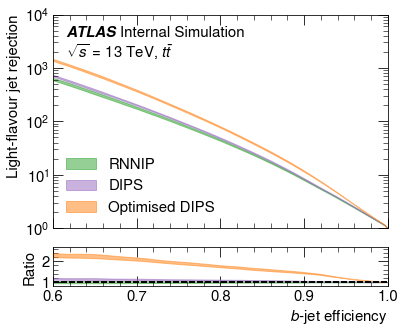

rnnip 5
pt_1000_d0_1_z0_1.5 5
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 5


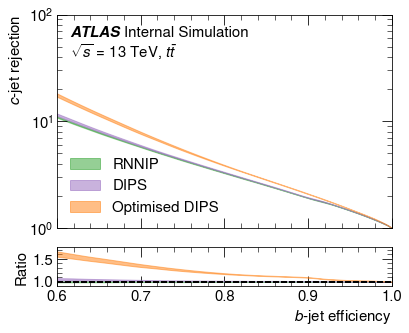

In [63]:
trkSelLabels = ['RNNIP','DIPS','Optimised DIPS']

lab4 = ['rnnip','pt_1000_d0_1_z0_1.5','pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0']

secondTag=r"$\sqrt{s}$ = 13 TeV, $t\bar{t}$"
myColors=['C2','C4','C1']

compareModels(beffs, leffs, trkSelLabels, lab4, ymax=1e4,
              ylabel='Light-flavour jet rejection',#rlabel='1/RNNIP',
              colors=myColors,legLoc='lower left',rrange=(.8,2.65),
              legFontSize=15,tag='l_stdROC')

compareModels(beffs, ceffs, trkSelLabels, lab4,ymax=100,
              ylabel='$c$-jet rejection',#rlabel='1/RNNIP',
              colors=myColors,legLoc='lower left',rrange=(.9,1.75),
              legFontSize=15,tag='c_stdROC')

rnnip 5
pt_1000_d0_1_z0_1.5 5


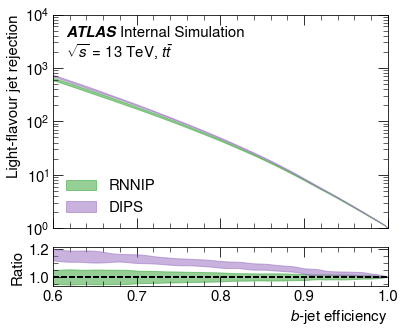

rnnip 5
pt_1000_d0_1_z0_1.5 5


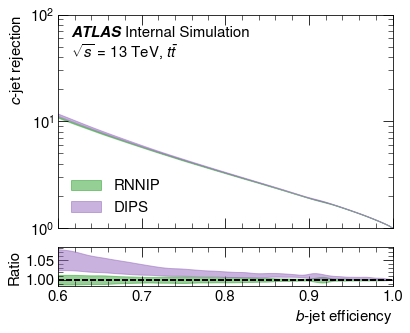

In [64]:
lab5 = ['rnnip','pt_1000_d0_1_z0_1.5']

secondTag=r"$\sqrt{s}$ = 13 TeV, $t\bar{t}$"
myColors=['C2','C4','C1']

compareModels(beffs, leffs, trkSelLabels[:2], lab5, ymax=1e4,
              ylabel='Light-flavour jet rejection',#rlabel='1 / RNNIP',
              colors=myColors,legLoc='lower left',#rrange=(0.9,1.3),
              legFontSize=15,tag='l_rnnip_dips')

compareModels(beffs, ceffs, trkSelLabels[:2], lab5,ymax=100,
              ylabel='$c$-jet rejection',#rlabel='1 / RNNIP',
              colors=myColors,legLoc='lower left',#rrange=(0.95,1.15),
              legFontSize=15,tag='c_rnnip_dips')

## Performance plots

**Plan:** We decided that we were going to plot RNNIP, DIPS and optimized DIPS on the same plot.

3000000 3000000
l (0, 750)
c (0, 20)
b (0, 1)


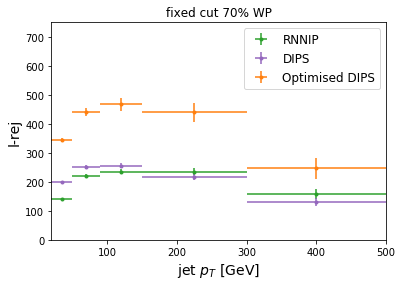

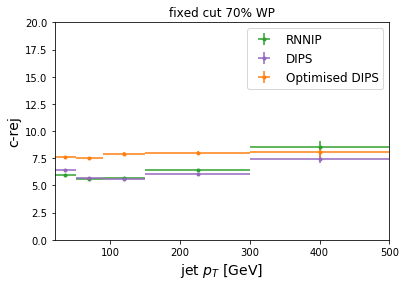

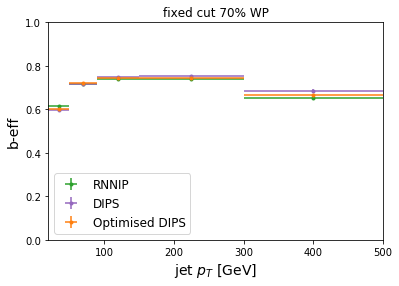

In [12]:
trkSelLabels = ['RNNIP','DIPS','Optimised DIPS']

plotPtDependence([pts['pt_1000_d0_1_z0_1.5'],pts['pt_1000_d0_1_z0_1.5'],pts['pt_500_d0_3.5_z0_5']],
                 [ ys['pt_1000_d0_1_z0_1.5'], ys['pt_1000_d0_1_z0_1.5'], ys['pt_500_d0_3.5_z0_5']],
                 [discs['rnnip'][1],discs['pt_1000_d0_1_z0_1.5'][1],discs['pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'][1]],
                 trkSelLabels,
                 lrej_lim=(0,750),crej_lim=(0,20),beff_lim=(0,1),
                 flat=False,binomialErrors=True,colors=myColors,#text=text,
                 pt_edges=np.array([20, 50, 90, 150, 300, 500]),
                 eff_bins = np.array([20,30,40,50,70,90,120,150,200,250,300,350,400,450,500]),
                 #figDir=figDir,subDir=subDir,tag=tag1,
                 verbose=False)

In [66]:
def avgIterPtDependence(pts, ys, discs, keys, labels, WP=0.7, flat=False,
                        pt_edges=np.array([20, 50, 90, 150, 300, 1000]),
                        eff_bins = np.array([20,30,40,50,70,90,120,150,200,250,300,400,500,1000]),
                        xlabel='jet $p_T$ [GeV]',var='pT',
                        lrej_lim=None,crej_lim=None,beff_lim=None, verbose=False, log=False,
                        tag='', figDir='../figures',subDir='mc16d',colors=None, 
                        firstTag='Internal Simulation',
                        secondTag=r"$\sqrt{s}$ = 13 TeV, $t\bar{t}$"):
    '''
    For a given list of discriminants, plot the b-eff, l and c-rej as a function
    of jet pt.

    For a list of discriminants, plot the b-eff, l-rej, and c-rej (comparing
    different algs) as a function of the jet pt

    Inputs:
    - pts, ys, discs: Dictionaries for the relevant variables for this plot
    - keys: 
    - labels: The labels for the legend of this plot
    - WP: The working point for the inclusive signal efficiency,
    - flat: boolean to indicate whether to calcuate for flat signal eff
    - pt_edges: The edges for the pt bins
    - eff_bins: Bins for calculating the flat signal efficiency
    - xlabel: The label for the x-axis
    - var: The variable you're plotting to save the figure as (default pT)
    - lrej_lim: The limit for the y-axis of the light rejection
    - crej_lim: The limit for the y-axis of the charm rejection
    - beff_lim: The limit for the y-axis of the b efficinecy
    - verbose: If True, print more information about the discriminant cuts used
               for each pT bin.
    - log: Whether to use a log scale for the plots (default False)
    - tag: A tag to append to the model name
    - subDir: the subdirectory in figures to save the model too
    - colors: The colors to use for each of the discs in the histograms
              If None, python's default color scheme palatte will be used

    '''

    assert len(keys) == len(labels)

    if colors is None:
        colors=["C{}".format(i) for i in range(len(discs))]

    # Get the edges for the histogram
    pt_midpts = (pt_edges[:-1] + pt_edges[1:]) / 2.
    bin_widths = (pt_edges[1:] - pt_edges[:-1]) / 2.
    Npts = pt_midpts.size

    for key, label, color in zip(keys, labels, colors):
    
        print(key,label)
        disc, pt, y = discs[key], pts[key], ys[key]

        # Get the sig eff and bkg rejections
        effs = np.zeros((3,Npts,len(disc)))

        for k, d in enumerate(disc):
        
            # Get the cut for the discriminant.
            nBins=100
            myRange=(np.min(d),np.max(d))
        
            if flat:
                cut = getFlatSigEff(pt, eff_bins, y, d, myRange, WP=WP, title=label,
                                    fig_idx=4,verbose=verbose)
            else:
                cut = workingPoint(d[y==2], nBins, myRange, WP=WP, verbose=verbose)

            for i in range(3):

                for j, pt_min, pt_max in zip(np.arange(Npts), pt_edges[:-1], pt_edges[1:]):

                    den_mask  = (pt > pt_min) & (pt < pt_max) & (y == i)
                    num_mask  = den_mask & (d > cut)
                    effs[i,j,k] = num_mask.sum() / den_mask.sum()

                    #print(i,j,k,'num',num_mask.sum(),'den',den_mask.sum())
                    
        for i in range(3):
            # For b-jets, plot the eff: for l and c-jets, look at the rej
            plt.figure(i+1)
                        
            if i == 2:
                
                avg = np.mean(effs[i],axis=-1)
                err = np.std(effs[i],axis=-1)

            else:
                rej = 1/effs[i]

                avg = np.mean(rej,axis=-1)
                err = np.std(rej,axis=-1)
                
            plt.errorbar(pt_midpts, avg, xerr=bin_widths, yerr=err,
                         markersize=0,
                         color=color,fmt='.',label=label)
    
    # Make the figures pretty + save them
    ylabels = ['Light-flavour jet rejection', '$c$-jet rejection', '$b$-jet efficiency']
    for i,flav,ylabel,ylim,loc in zip(range(3), ['l','c','b'], ylabels,[lrej_lim,crej_lim,beff_lim], 
                                      ['upper right','upper right','lower left']):

        metric = 'eff' if i==2 else 'rej'
        
        fig = plt.figure(i+1)
        fig.set_size_inches(7,5)
        plt.xlabel(xlabel,ha='right',x=1)
        plt.ylabel(ylabel,ha='right',y=1)
        if log:
            plt.yscale('log')
            logTag="_log"
        else:
            logTag=""

        title = '\n{} {}% WP'.format('flat' if flat else 'fixed cut',int(WP*100))
        
        
        ax = plt.gca()
        pas.makeATLAStag(ax, fig, first_tag=firstTag, second_tag=secondTag+title,ymax=.9)

        plt.xlim(pt_edges[0],pt_edges[-1])
        if ylim is not None:
            print(flav,ylim)
            plt.ylim(ylim)
        plt.legend(loc=loc)

        if len(tag) > 0:
            plt.savefig('{}/{}/{}-{}_vs_{}{}{}_{}{}.pdf'.format(figDir,subDir,flav,metric,var,'_flatEff' if flat else '',100*WP,tag,logTag),
                        bbox_inches='tight')
    
    plt.show()

In [65]:
?plt.errorbar

In [47]:
pts[ 'rnnip'] =  pts['pt_1000_d0_1_z0_1.5']
etas['rnnip'] = etas['pt_1000_d0_1_z0_1.5']
mus[ 'rnnip'] =  mus['pt_1000_d0_1_z0_1.5']
ys[  'rnnip'] =   ys['pt_1000_d0_1_z0_1.5']

pts[ 'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'] =  pts['pt_500_d0_3.5_z0_5']
etas['pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'] = etas['pt_500_d0_3.5_z0_5']
mus[ 'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'] =  mus['pt_500_d0_3.5_z0_5']
ys[  'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'] =   ys['pt_500_d0_3.5_z0_5'] 

But to be consistent with the rest of the note, I'd like to plot using the errors of several trainings for the error bars.

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 2750)
c (0, 30)
b (0, 1.2)


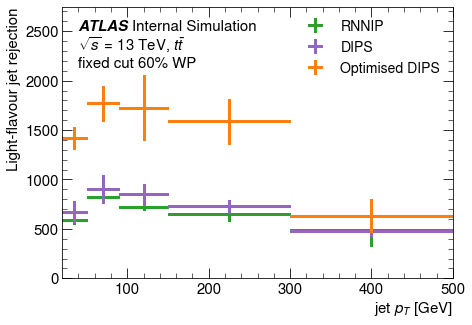

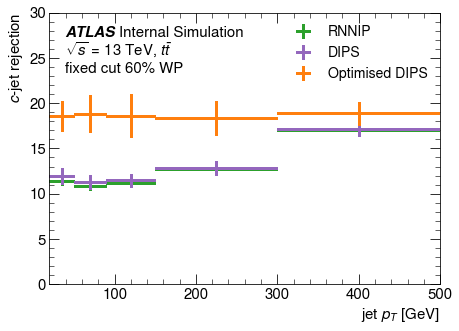

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 1000.0)
c (0, 15)
b (0, 1.2)


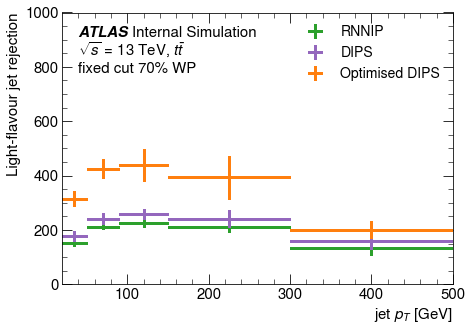

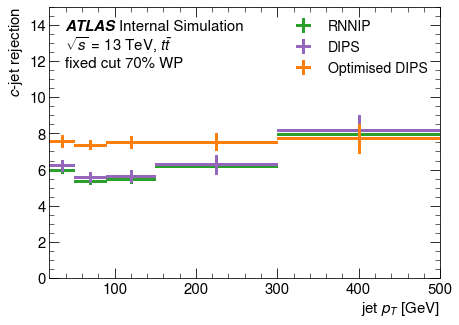

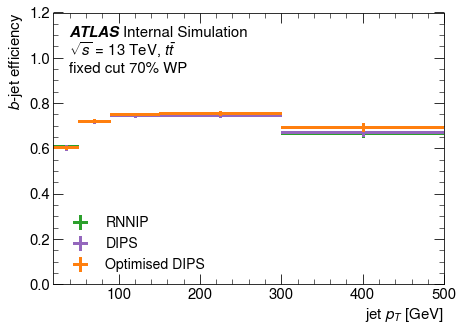

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 300)
c (0, 10)
b (0, 1.2)


rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 100)
c (0, 7)
b (0, 1.2)


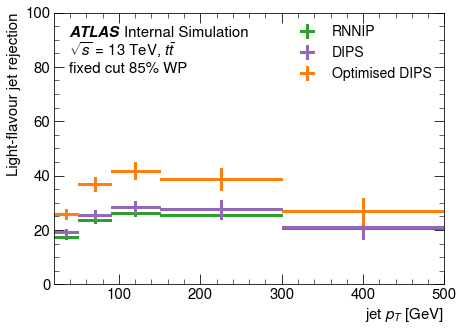

In [69]:
for WP, llim, clim in zip([0.60, 0.70, 0.77, 0.85],
                          [(0,2750),(0,1e3),(0,300),(0,100)],
                          [(0,30),(0,15),(0,10),(0,7)]):
    
    avgIterPtDependence(pts, ys, discs, lab4, trkSelLabels, WP=WP, 
                        lrej_lim=llim, crej_lim=clim, beff_lim=(0,1.2), colors=myColors,
                        pt_edges=np.array([20, 50, 90, 150, 300, 500]),
                        eff_bins = np.array([20,30,40,50,70,90,120,150,200,250,300,350,400,450,500]),
                        figDir='figures',subDir='',tag='std')
    #break

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 2750)
c (0, 50)
b (0, 1.2)


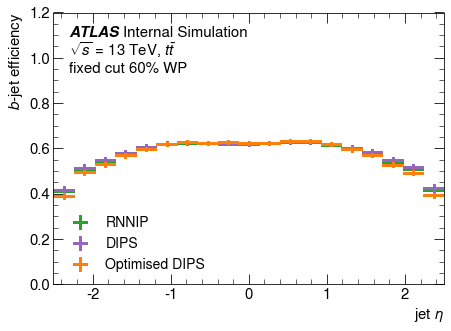

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 1000.0)
c (0, 20)
b (0, 1.2)


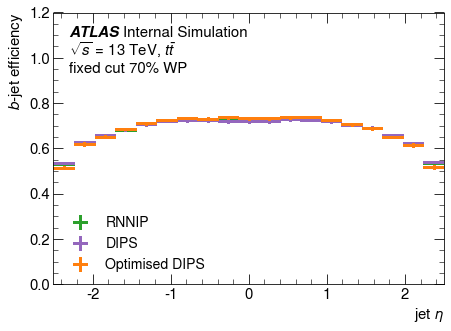

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 300)
c (0, 15)
b (0, 1.2)


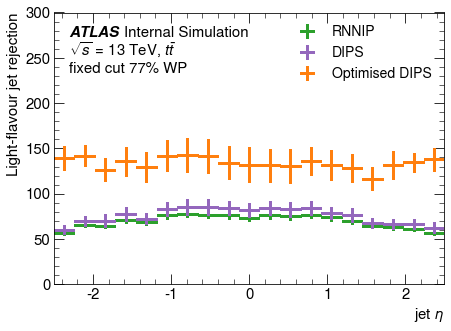

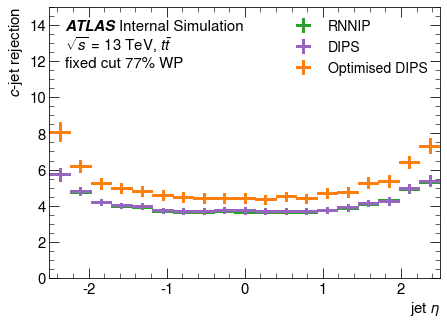

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 100)
c (0, 7)
b (0, 1.2)


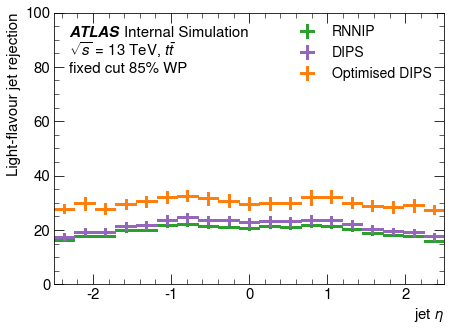

In [70]:
eta_min, eta_max = (-2.5,2.5)

for WP, llim, clim in zip([0.60, 0.70, 0.77, 0.85],
                          [(0,2750),(0,1e3),(0,300),(0,100)],
                          [(0,50),(0,20),(0,15),(0,7)]):
    
    avgIterPtDependence(etas, ys, discs, lab4, trkSelLabels, WP=WP, 
                        xlabel='jet $\eta$',var='eta',colors=myColors,
                        lrej_lim=llim, crej_lim=clim, beff_lim=(0,1.2),
                        pt_edges=np.linspace(eta_min,eta_max,20),
                        eff_bins = np.linspace(eta_min,eta_max,100),
                        figDir='figures',subDir='',tag='std')


rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 5000)
c (0, 50)
b (0, 1.2)


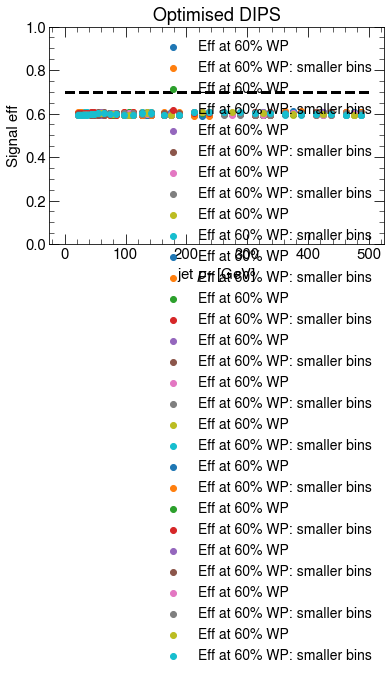

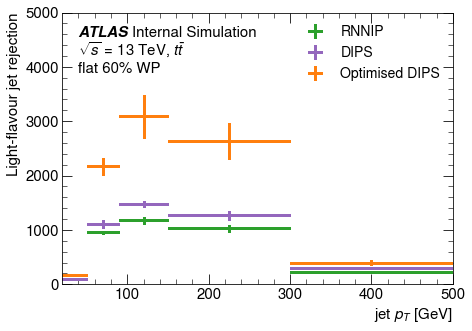

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 1500)
c (0, 20)
b (0, 1.2)


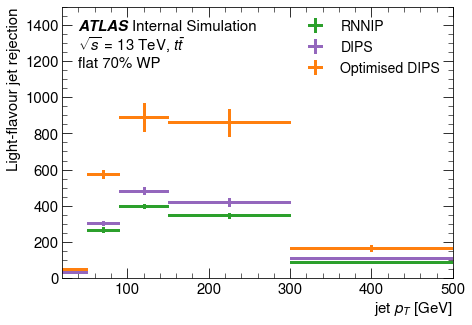

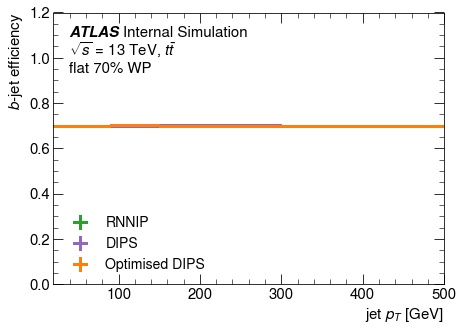

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 500)
c (0, 10)
b (0, 1.2)


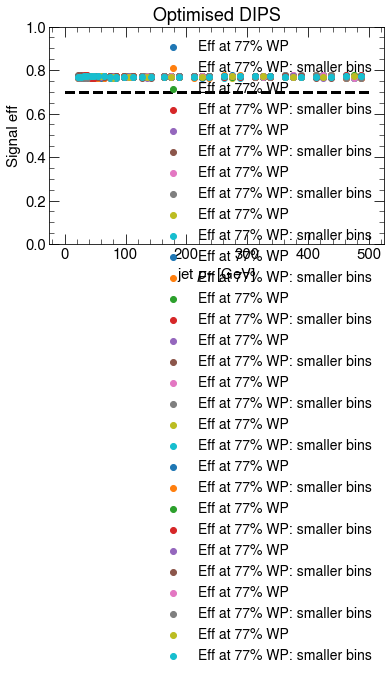

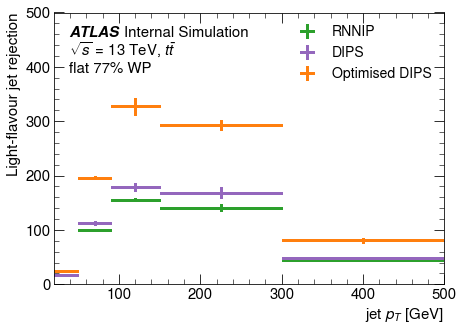

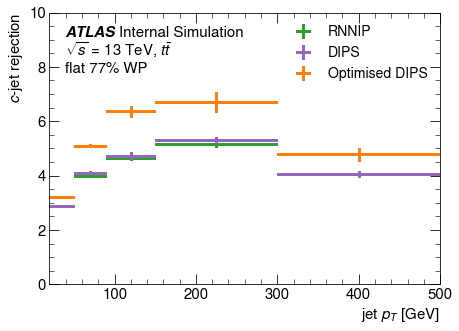

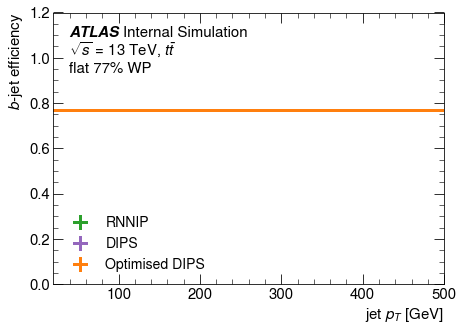

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 200)
c (0, 10)
b (0, 1.2)


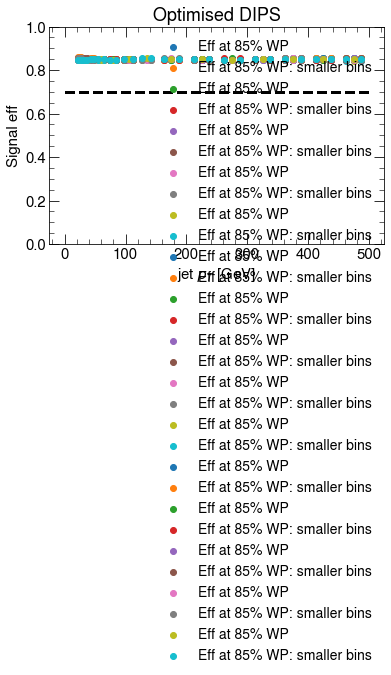

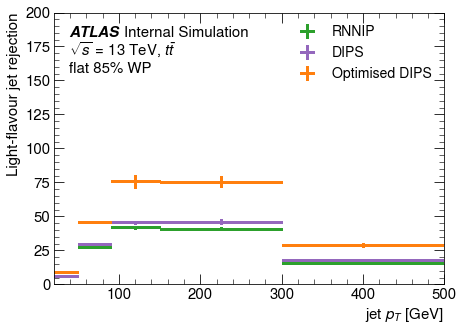

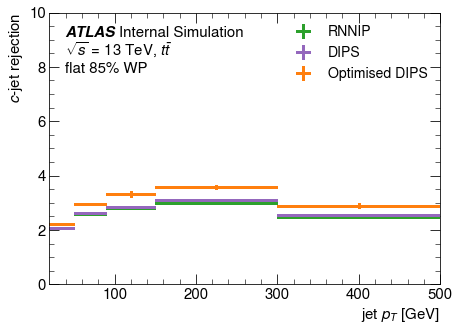

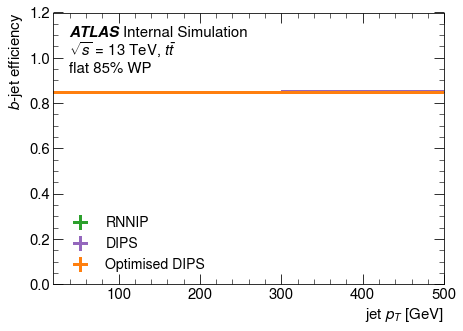

In [71]:
for WP,llim,clim in zip([0.60, 0.70, 0.77, 0.85],
                        [(0,5000),(0,1500),(0,500),(0,200)],
                        [(0,50),(0,20),(0,10),(0,10)]): 
    
#     if (WP==.6) or (WP == .7) or (WP ==.77):
#         continue
    
    avgIterPtDependence(pts, ys, discs, lab4, trkSelLabels, WP=WP, 
                        lrej_lim=llim, crej_lim=clim, beff_lim=(0,1.2),
                        flat=True,colors=myColors,
                        pt_edges=np.array([20, 50, 90, 150, 300, 500]),
                        eff_bins = np.array([20,30,40,50,70,90,120,150,200,250,300,350,400,450,500]),
                        figDir='figures',subDir='',tag='std')
#     break

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 5000)
c (0, 50)
b (0, 1.2)


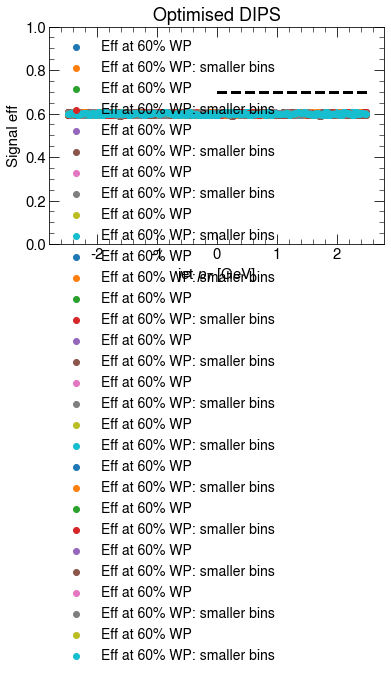

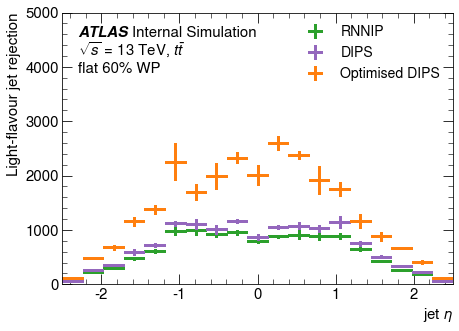

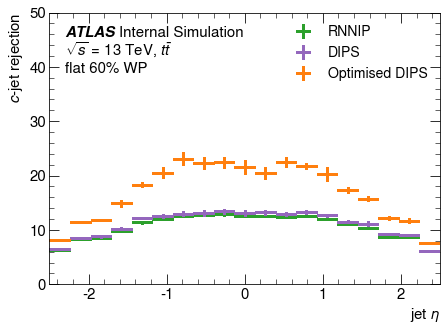

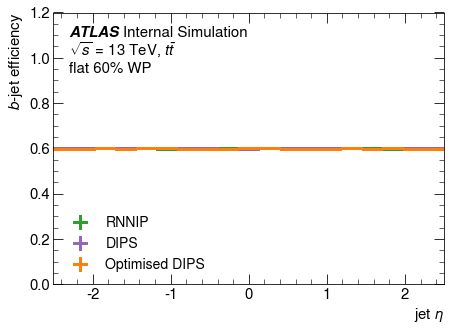

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 1500)
c (0, 20)
b (0, 1.2)


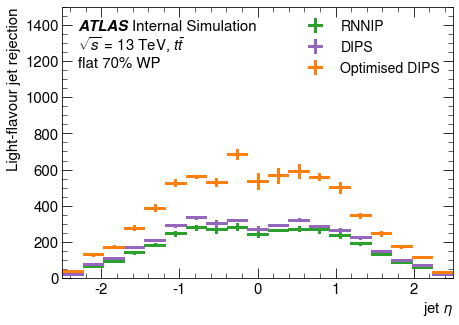

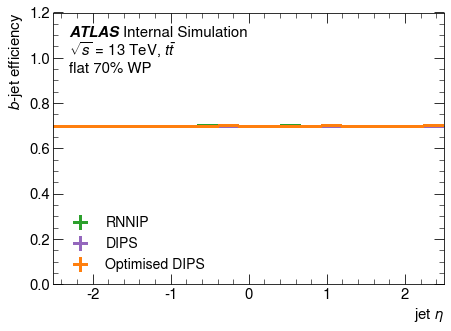

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 400)
c (0, 10)
b (0, 1.2)


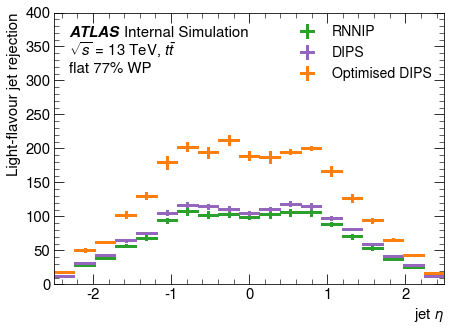

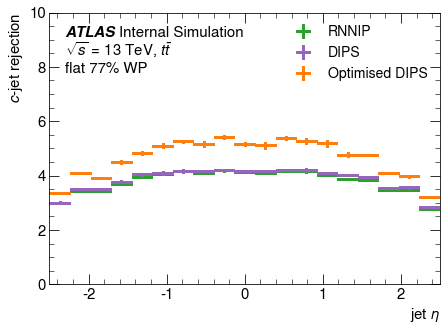

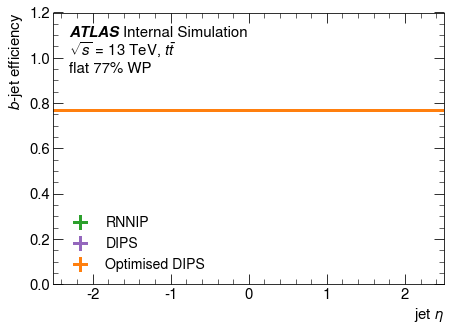

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 300)
c (0, 10)
b (0, 1.2)


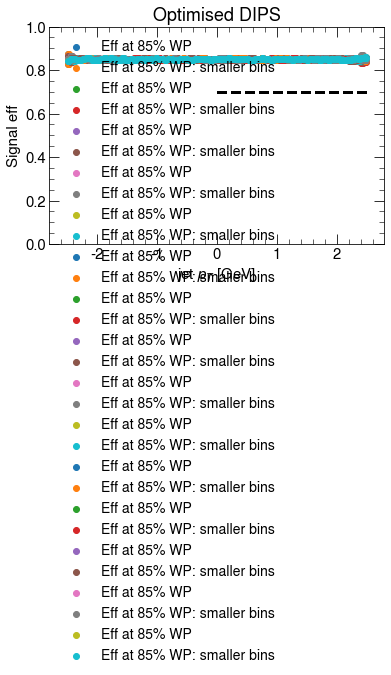

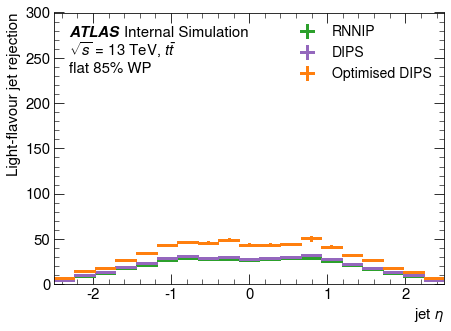

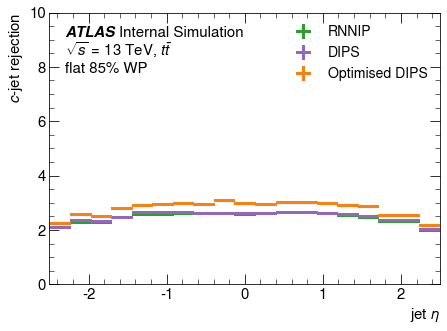

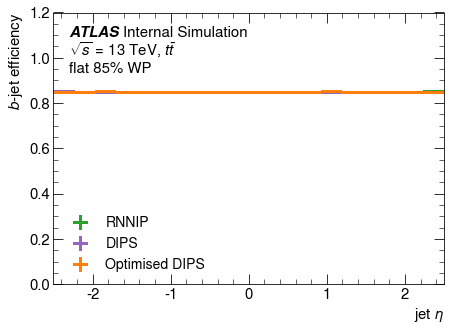

In [72]:
for WP,llim,clim in zip([0.60, 0.70, 0.77, 0.85],
                        [(0,5000),(0,1500),(0,400),(0,300)],
                        [(0,50),(0,20),(0,10),(0,10)]):
    
#     if (WP == .6) or (WP == .7):
#         continue
    
    avgIterPtDependence(etas, ys, discs, lab4, trkSelLabels, WP=WP, 
                        xlabel='jet $\eta$',var='eta',
                        lrej_lim=llim, crej_lim=clim, beff_lim=(0,1.2),
                        flat=True,colors=myColors,
                        pt_edges=np.linspace(eta_min,eta_max,20),
                        eff_bins = np.linspace(eta_min,eta_max,100),
                        figDir='figures',subDir='',tag='std')
    
#     break

In [38]:
jdf.columns

Index(['LabDr_HadF', 'pt_orig', 'eta_orig', 'phi_orig', 'm', 'aliveAfterOR',
       'aliveAfterORmu', 'isBadMedium', 'JVT', 'pt', 'eta', 'phi', 'nBHadr',
       'nCHadr', 'bH_pt', 'bH_eta', 'bH_Lxy', 'bH_dRjet', 'bH_PtTrk',
       'bH_MTrk', 'bH_nBtracks', 'bH_nCtracks', 'bH_nBtracks_400',
       'bH_nCtracks_400', 'vecSumTrkPt', 'nTrk', 'nTrk_PU', 'nTrk_HF',
       'nTrk_frag', 'nTrk_GEANT', 'avgmu', 'eventnb'],
      dtype='object')

In [39]:
y

array([0., 2., 2., ..., 1., 2., 2.])

In [40]:
np.sum(y==1)/y.shape[0]

0.08183566666666667

In [41]:
np.sum(y==1)/np.sum((y==0) | (y==1))

0.1337845002950804

**Finally - $\mu$ plots (as per Thomas's suggestion)!!** 

Fortunately, I've already saved $<\mu>$

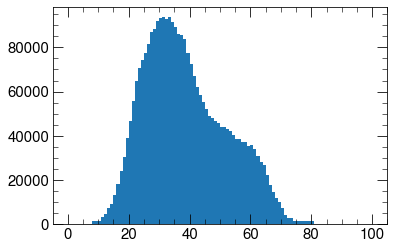

In [43]:
plt.hist(jdf.avgmu,100,(0,100))
plt.show()

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 2750)
c (0, 30)
b (0, 1.2)


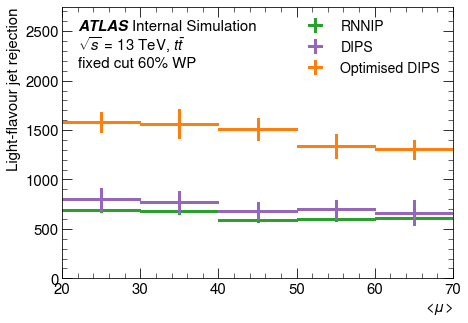

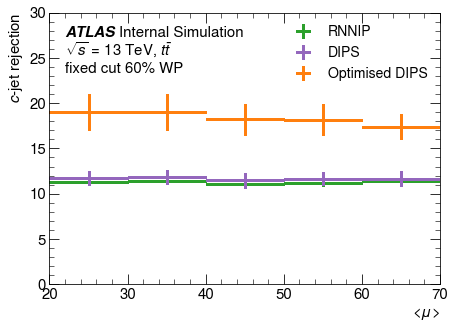

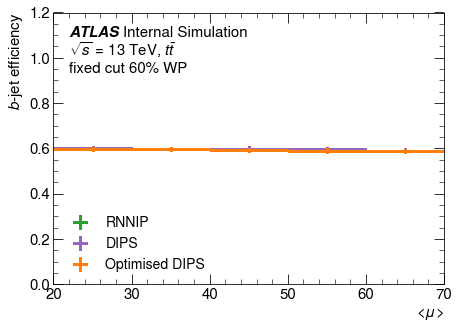

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 1000.0)
c (0, 15)
b (0, 1.2)


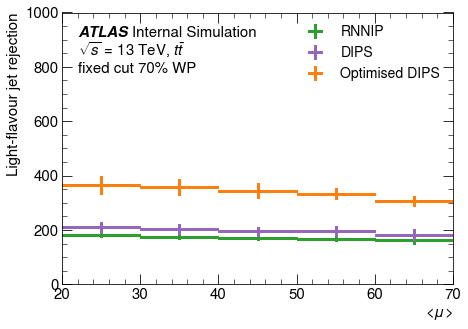

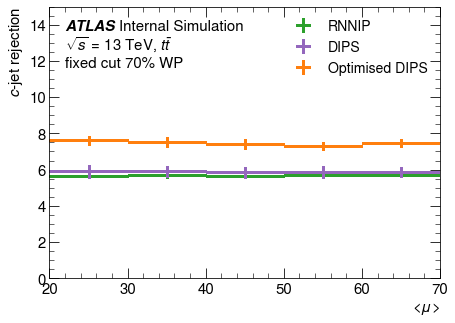

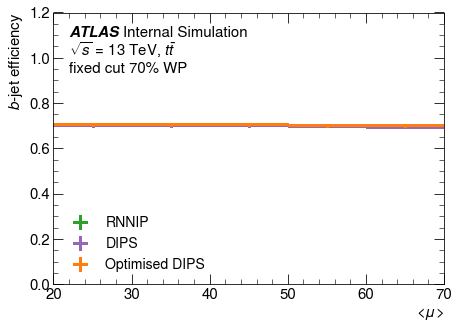

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 300)
c (0, 10)
b (0, 1.2)


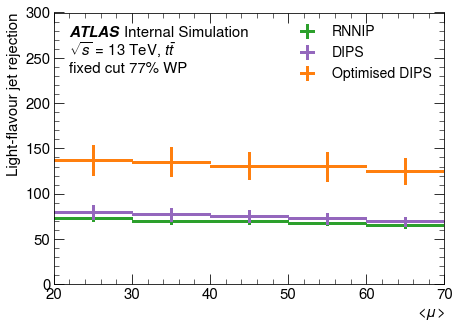

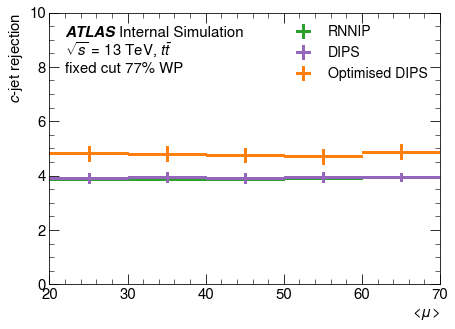

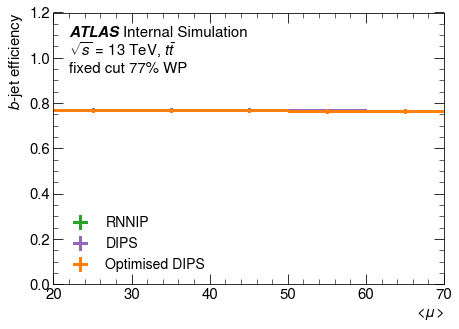

rnnip RNNIP
pt_1000_d0_1_z0_1.5 DIPS
pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0 Optimised DIPS
l (0, 100)
c (0, 7)
b (0, 1.2)


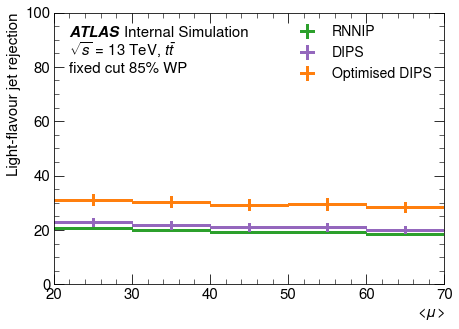

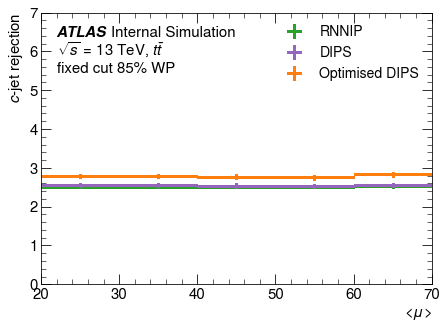

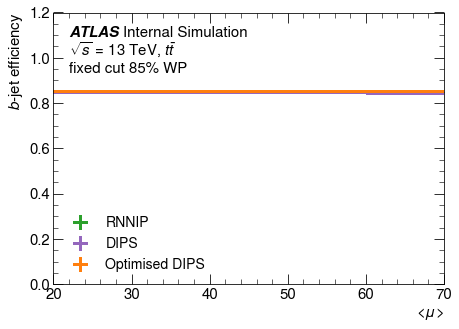

In [73]:
for WP, llim, clim in zip([0.60, 0.70, 0.77, 0.85],
                          [(0,2750),(0,1e3),(0,300),(0,100)],
                          [(0,30),(0,15),(0,10),(0,7)]):
#     if (WP==.6) or (WP == .7) or (WP ==.77):
#         continue
    
    avgIterPtDependence(mus, ys, discs, lab4, trkSelLabels, WP=WP,
                        xlabel='<$\mu$>',var='avgmu',
                        lrej_lim=llim, crej_lim=clim, beff_lim=(0,1.2),
                        colors=myColors,
                        pt_edges=np.array([20, 30, 40, 50, 60, 70]),
                        figDir='figures',subDir='',tag='std')
#     break

In [50]:
mus.keys()

dict_keys(['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10', 'rnnip', 'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'])

In [51]:
pts.keys()

dict_keys(['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10', 'rnnip', 'pt_500_d0_3.5_z0_5_ip3d_d0_ip3d_z0'])

In [57]:
discs.keys()

dict_keys(['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10', 'rnnip'])